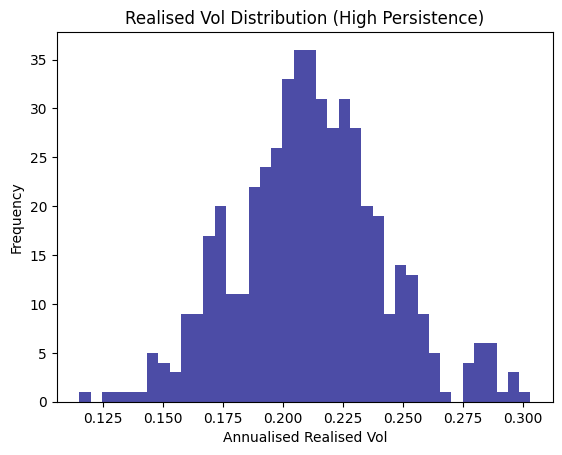

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Parameters ---
np.random.seed(42)

P_high = np.array([[0.95, 0.05],
                   [0.10, 0.90]])

mu = 0.03
sigma_low = 0.10
sigma_high = 0.35
S0 = 100

n_steps = 252
n_simulations = 500
dt = 1/252

# --- Regime Path (High Persistence) ---
regime_high = np.zeros((n_steps, n_simulations), dtype=int)

for i in range(n_simulations):
    for t in range(1, n_steps):
        current_state = regime_high[t-1, i]
        u = np.random.rand()
        if u < P_high[current_state, 0]:
            regime_high[t, i] = 0
        else:
            regime_high[t, i] = 1

# --- Price Simulation ---
S_high = np.zeros((n_steps, n_simulations))

for i in range(n_simulations):
    Z = np.random.standard_normal(n_steps)
    S_high[0, i] = S0

    for t in range(1, n_steps):
        sigma_t = sigma_low if regime_high[t, i] == 0 else sigma_high
        S_high[t, i] = S_high[t-1, i] * np.exp((mu - 0.5*sigma_t**2)*dt + sigma_t*np.sqrt(dt)*Z[t])

# --- Compute Returns (vectorised) ---
returns_high = np.log(S_high[1:] / S_high[:-1])    # shape: (251, 500)

# --- Realised Vol (annualised) ---
rv_high = returns_high.std(axis=0) * np.sqrt(252)

# --- Percentage of time spent in high-vol regime ---
pct_high_regime = (regime_high.sum(axis=0) / n_steps)

# --- Plot histogram ---
plt.hist(rv_high, bins=40, color='navy', alpha=0.7)
plt.title("Realised Vol Distribution (High Persistence)")
plt.xlabel("Annualised Realised Vol")
plt.ylabel("Frequency")
plt.show();


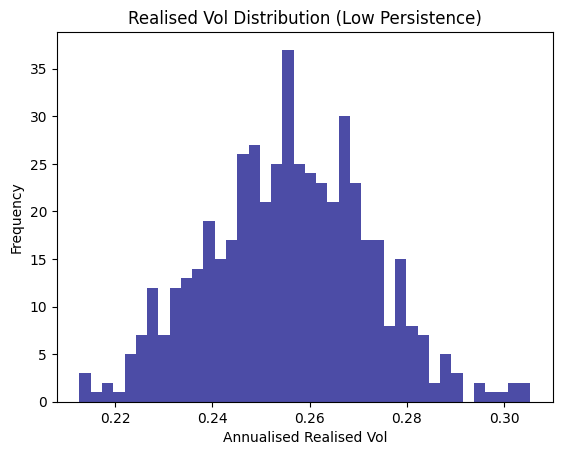

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Parameters ---
np.random.seed(42)

P_low = np.array([[0.60, 0.40],
                   [0.40, 0.60]])

mu = 0.03
sigma_low = 0.10
sigma_high = 0.35
S0 = 100

n_steps = 252
n_simulations = 500
dt = 1/252

# --- Regime Path (High Persistence) ---
regime_low = np.zeros((n_steps, n_simulations), dtype=int)

for i in range(n_simulations):
    for t in range(1, n_steps):
        current_state = regime_low[t-1, i]
        u = np.random.rand()
        if u < P_low[current_state, 0]:
            regime_low[t, i] = 0
        else:
            regime_low[t, i] = 1

# --- Price Simulation ---
S_low = np.zeros((n_steps, n_simulations))

for i in range(n_simulations):
    Z = np.random.standard_normal(n_steps)
    S_low[0, i] = S0

    for t in range(1, n_steps):
        sigma_t = sigma_low if regime_high[t, i] == 0 else sigma_high
        S_low[t, i] = S_high[t-1, i] * np.exp((mu - 0.5*sigma_t**2)*dt + sigma_t*np.sqrt(dt)*Z[t])

# --- Compute Returns (vectorised) ---
returns_low = np.log(S_low[1:] / S_low[:-1])    # shape: (251, 500)

# --- Realised Vol (annualised) ---
rv_low = returns_low.std(axis=0) * np.sqrt(252)

# --- Percentage of time spent in high-vol regime ---
pct_low_regime = (regime_low.sum(axis=0) / n_steps)

# --- Plot histogram ---
plt.hist(rv_low, bins=40, color='navy', alpha=0.7)
plt.title("Realised Vol Distribution (Low Persistence)")
plt.xlabel("Annualised Realised Vol")
plt.ylabel("Frequency")
plt.show();